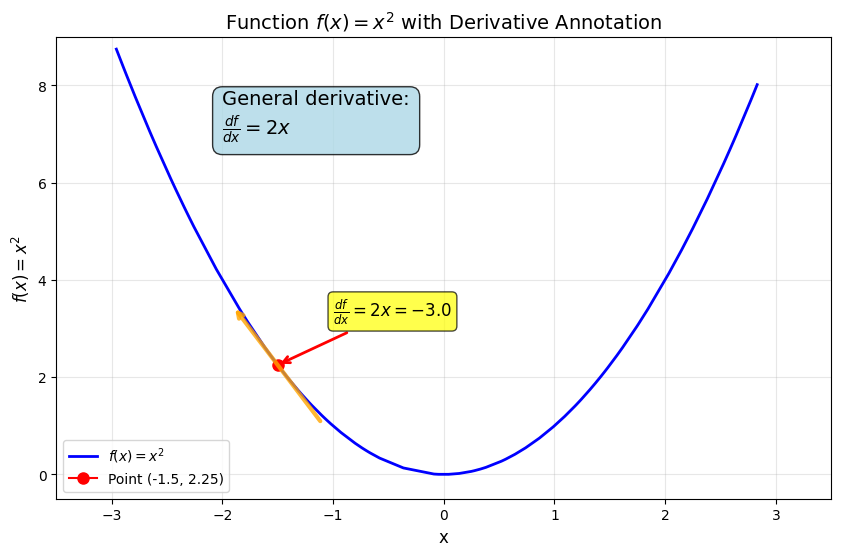

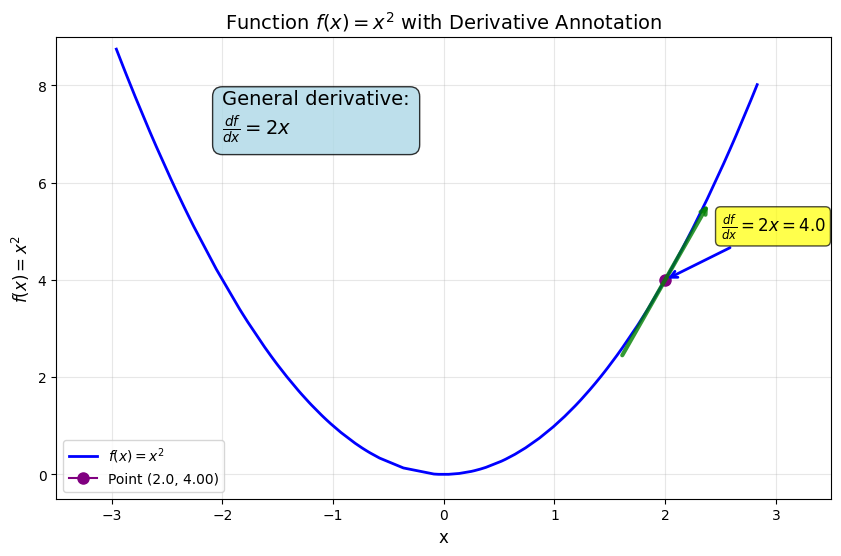

In [23]:
import matplotlib.pyplot as plt
import numpy as np


def plot_function_with_derivative(
        x,
        y,
        x_point=-1.5,
        figsize=(10, 6),
        function_color='blue',
        function_linewidth=2,
        point_color='red',
        point_size=8,
        tangent_arrow_length=0.8,
        tangent_arrow_color='orange',
        tangent_arrow_width=3,
        annotation_arrow_color='red',
        annotation_arrow_width=2,
        annotation_offset=(0.5, 1),
        general_text_position=(-2, 7),
        xlim=(-3.5, 3.5),
        ylim=(-0.5, 9)
):
    """
    Plot a quadratic function with derivative annotations.

    Parameters:
    - x, y: arrays for the function data
    - x_point: x-coordinate where to show the derivative
    - figsize: figure size tuple
    - function_color: color of the main function line
    - function_linewidth: width of the main function line
    - point_color: color of the point marker
    - point_size: size of the point marker
    - tangent_arrow_length: length of the tangent arrow
    - tangent_arrow_color: color of the tangent arrow
    - tangent_arrow_width: width of the tangent arrow
    - annotation_arrow_color: color of the annotation arrow
    - annotation_arrow_width: width of the annotation arrow
    - annotation_offset: offset for the derivative annotation
    - general_text_position: position for the general derivative text
    - xlim, ylim: axis limits
    """

    # Calculate derivative values
    y_point = x_point ** 2
    derivative_at_point = 2 * x_point

    # Create the plot
    plt.figure(figsize=figsize)
    plt.plot(x, y, color=function_color, linewidth=function_linewidth, label=r'$f(x) = x^2$')

    # Add a marker at the chosen point
    plt.plot(x_point, y_point, color=point_color, marker='o', markersize=point_size,
             label=f'Point ({x_point}, {y_point:.2f})')

    # Create tangent arrow
    x_start = x_point - tangent_arrow_length / 2
    x_end = x_point + tangent_arrow_length / 2
    y_start = derivative_at_point * (x_start - x_point) + y_point
    y_end = derivative_at_point * (x_end - x_point) + y_point

    arrow_style = '->' if x_point > 0 else '<-'
    plt.annotate('', xy=(x_end, y_end), xytext=(x_start, y_start),
                 arrowprops=dict(arrowstyle=arrow_style, color=tangent_arrow_color,
                                 lw=tangent_arrow_width, alpha=0.8))

    # Add arrow annotation showing the derivative with LaTeX
    plt.annotate(rf'$\frac{{df}}{{dx}} = 2x = {derivative_at_point}$',
                 xy=(x_point, y_point),
                 xytext=(x_point + annotation_offset[0], y_point + annotation_offset[1]),
                 arrowprops=dict(arrowstyle='->', color=annotation_arrow_color, lw=annotation_arrow_width),
                 fontsize=12,
                 bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

    # Add general derivative annotation with LaTeX
    plt.text(general_text_position[0], general_text_position[1],
             r'General derivative:' + '\n' + r'$\frac{df}{dx} = 2x$',
             fontsize=14,
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

    # Configure plot
    plt.grid(True, alpha=0.3)
    plt.xlabel('x', fontsize=12)
    plt.ylabel(r'$f(x) = x^2$', fontsize=12)
    plt.title(r'Function $f(x) = x^2$ with Derivative Annotation', fontsize=14)
    plt.legend()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()


x = np.sort(np.random.uniform(-3, 3, 100))
y = np.pow(x, 2)

# Use the function with default parameters
plot_function_with_derivative(x, y)

# Use the function with custom parameters
plot_function_with_derivative(x, y,
                              x_point=2.0,
                              tangent_arrow_color='green',
                              point_color='purple',
                              annotation_arrow_color='blue')


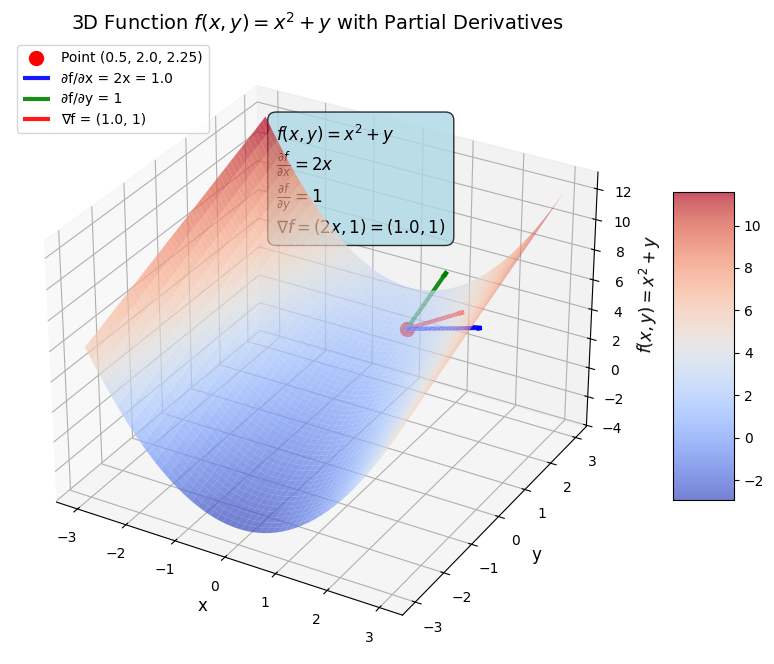

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_function_with_derivatives(x_range=(-3, 3), y_range=(-3, 3),
                                      x_point=1.5, y_point=1.0,
                                      figsize=(12, 8),
                                      surface_alpha=0.7,
                                      surface_cmap='viridis',
                                      point_color='red',
                                      point_size=100,
                                      gradient_arrow_length=1.0,
                                      gradient_arrow_color='red',
                                      gradient_arrow_width=3,
                                      partial_x_arrow_color='blue',
                                      partial_y_arrow_color='green',
                                      arrow_alpha=0.9,
                                      grid_resolution=50):
    """
    Plot a 3D function f(x,y) = x² + y with partial derivative annotations.

    Parameters:
    - x_range, y_range: tuples defining the plotting range
    - x_point, y_point: coordinates where to show the derivatives
    - figsize: figure size tuple
    - surface_alpha: transparency of the surface
    - surface_cmap: colormap for the surface
    - point_color: color of the point marker
    - point_size: size of the point marker
    - gradient_arrow_length: length of the gradient arrow
    - gradient_arrow_color: color of the gradient arrow
    - gradient_arrow_width: width of the gradient arrow
    - partial_x_arrow_color: color of the partial derivative w.r.t. x arrow
    - partial_y_arrow_color: color of the partial derivative w.r.t. y arrow
    - arrow_alpha: transparency of arrows
    - grid_resolution: resolution of the surface mesh
    """

    # Create meshgrid for surface
    x = np.linspace(x_range[0], x_range[1], grid_resolution)
    y = np.linspace(y_range[0], y_range[1], grid_resolution)
    X, Y = np.meshgrid(x, y)
    Z = X ** 2 + Y  # f(x,y) = x² + y

    # Calculate derivatives at the point
    z_point = x_point ** 2 + y_point
    partial_x = 2 * x_point  # ∂f/∂x = 2x
    partial_y = 1  # ∂f/∂y = 1

    # Create the 3D plot
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface
    surf = ax.plot_surface(X, Y, Z, alpha=surface_alpha, cmap=surface_cmap,
                           linewidth=0, antialiased=True)

    # Add a marker at the chosen point
    ax.scatter([x_point], [y_point], [z_point], color=point_color, s=point_size,
               label=f'Point ({x_point}, {y_point}, {z_point:.2f})')

    # Create arrows for partial derivatives
    arrow_scale = gradient_arrow_length

    # Partial derivative with respect to x (blue arrow)
    ax.quiver(x_point, y_point, z_point,
              arrow_scale, 0, partial_x * arrow_scale,
              color=partial_x_arrow_color, alpha=arrow_alpha,
              arrow_length_ratio=0.1, linewidth=gradient_arrow_width,
              label=f'∂f/∂x = 2x = {partial_x}')

    # Partial derivative with respect to y (green arrow)
    ax.quiver(x_point, y_point, z_point,
              0, arrow_scale, partial_y * arrow_scale,
              color=partial_y_arrow_color, alpha=arrow_alpha,
              arrow_length_ratio=0.1, linewidth=gradient_arrow_width,
              label=f'∂f/∂y = 1')

    # Gradient vector (red arrow) - combination of both partial derivatives
    ax.quiver(x_point, y_point, z_point,
              partial_x * arrow_scale * 0.5, partial_y * arrow_scale * 0.5,
              (partial_x ** 2 + partial_y ** 2) ** 0.5 * arrow_scale * 0.3,
              color=gradient_arrow_color, alpha=arrow_alpha,
              arrow_length_ratio=0.1, linewidth=gradient_arrow_width,
              label=f'∇f = ({partial_x}, {partial_y})')

    # Add text annotations
    ax.text(x_range[0] + 0.5, y_range[1] - 0.5, z_point + 3,
            r'$f(x,y) = x^2 + y$' + '\n' +
            r'$\frac{\partial f}{\partial x} = 2x$' + '\n' +
            r'$\frac{\partial f}{\partial y} = 1$' + '\n' +
            rf'$\nabla f = (2x, 1) = ({partial_x}, {partial_y})$',
            fontsize=12,
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

    # Configure plot
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_zlabel(r'$f(x,y) = x^2 + y$', fontsize=12)
    ax.set_title(r'3D Function $f(x,y) = x^2 + y$ with Partial Derivatives', fontsize=14)
    ax.legend(loc='upper left')

    # Add colorbar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    plt.show()


# Use the function with default parameters
# plot_3d_function_with_derivatives()
#
# # Use the function with custom parameters
# plot_3d_function_with_derivatives(x_point=2.0, y_point=-1.5,
#                                   gradient_arrow_color='purple',
#                                   partial_x_arrow_color='orange',
#                                   surface_cmap='plasma',
#                                   surface_alpha=0.8)

# Interactive version - you can rotate and zoom
plot_3d_function_with_derivatives(x_point=0.5, y_point=2.0,
                                  gradient_arrow_length=1.5,
                                  surface_cmap='coolwarm')
